# Data Exploration

In [2]:
# Install packages.

%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies.

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load Data.

books = pd.read_csv('../data/BX-Books.csv', sep=";", dtype=str, encoding="CP1252", escapechar='\\')
ratings = pd.read_csv('../data/BX-Book-Ratings.csv', sep=';', converters = {'user': int, 'isbn': str, 'rating': float} , encoding="CP1252")
users = pd.read_csv('../data/BX-Users.csv', sep=";", converters = {"User-ID": str,"Location":str,"Age": str}, encoding="CP1252", escapechar='\\')

In [5]:
# Ratings Analysis.

ratings_distribution = ratings.loc[:,"rating"].value_counts()

x = ratings['user'].value_counts(ascending=False)[:20]
mean_rating = ratings['rating'].where(lambda x : x != 0).mean() # 7.601852

print("Ratings Distribution: \n{}".format(ratings_distribution))
print("\nMean Rating: {}".format(mean_rating))

Ratings Distribution: 
0.0     651330
8.0      95037
10.0     71814
7.0      70018
9.0      62101
5.0      46953
6.0      33753
4.0       8031
3.0       5445
2.0       2492
1.0       1601
Name: rating, dtype: int64

Mean Rating: 7.601852760890634


In [6]:
# User Analysis.

nr_users_with_age = sum(cnt > 0 for cnt in users["Age"].apply(lambda x: int(x) if x != 'NULL' else 0) ) # 167680
user_age_without_null = users['Age'].where(lambda x: x != "NULL").dropna()

user_age_groups = user_age_without_null.value_counts()

min = 1000
max = 0
for age in user_age_without_null:
    if age != "NULL" and age != "0":
        if int(age) > 0 and int(age) < min:
            min = int(age)
        if(int(age) > 0 and int(age) > max):
            max = int(age)

print("\nNumber of Users with Age != Null: {}".format(nr_users_with_age))
print("Users Max Age: {}".format(max))
print("Users Min Age: {}".format(min))
print("Users Age with Most Frequency: {}".format(user_age_groups.head(1)))




Number of Users with Age != Null: 167680
Users Max Age: 244
Users Min Age: 1
Users Age with Most Frequency: 24    5687
Name: Age, dtype: int64


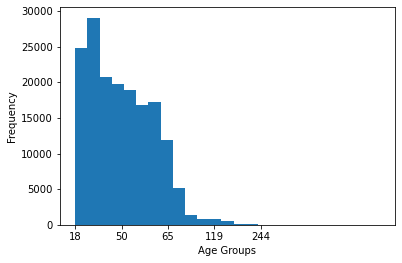

In [15]:
# Plot User Distribution.

plt.xticks([0, 25, 50, 75, 100,  ]) #[0, 15, 30, 45, 60, 75, 90, 105, 120, 145, 160, 185, 205]
plt.hist(users['Age'].where(lambda x: x != "NULL").dropna(), bins=25)
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.show()